Mini Project 1: Credit Card Default Risk Analysis

Problem Statement: Credit card defaults create major risks for financial institutions. The goal of this project is to build machine learning models that predict the likelihood of default using client demographics, financial, and repayment data. By comparing multiple classification algorithms, we aim to identify the most effective model for credit risk analysis.

### Dataset:

30,000 clients × 25 attributes (Taiwanese credit card default dataset)

### Learning Objectives:

1. Apply ML in financial sector (credit risk prediction).

2. Work with a real-world dataset.

3. Compare multiple classification models.

### Packages used:
* `Pandas` for data frames and easy to read csv files  
* `Numpy` for array and matrix mathematics functions  
* `Matplotlib` and `Seaborn` for visualization
*  `sklearn` for the metrics and pre-processing

### Train and evaluate the model using  3 ML models:

* Logistic Regression – baseline linear model for binary classification.
* Support Vector Machine (SVM) – margin-based classifier for robust separation
* Random Forest – ensemble of decision trees to handle non-linearity.

### Each model was trained on 70% of the data and evaluated on the remaining 30% using:

* Accuracy

* Confusion Matrix

* Precision, Recall, F1-Score

## Load packages

In [ ]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

## Load dataset
 -  Please find the dataset in the attachment

In [ ]:
# YOUR CODE HERE
df=pd.read_csv("./default_of_credit_card_clients.csv", header=1) # Read the CSV using the second row as header
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   ID                           30000 non-null  int64
 1   LIMIT_BAL                    30000 non-null  int64
 2   SEX                          30000 non-null  int64
 3   EDUCATION                    30000 non-null  int64
 4   MARRIAGE                     30000 non-null  int64
 5   AGE                          30000 non-null  int64
 6   PAY_0                        30000 non-null  int64
 7   PAY_2                        30000 non-null  int64
 8   PAY_3                        30000 non-null  int64
 9   PAY_4                        30000 non-null  int64
 10  PAY_5                        30000 non-null  int64
 11  PAY_6                        30000 non-null  int64
 12  BILL_AMT1                    30000 non-null  int64
 13  BILL_AMT2                    30000 non-null  i

In [ ]:
# YOUR CODE HERE
df.describe()
df.shape

(30000, 25)

## Exploratory Data Analysis

The dataset consists of **23 explanatory variables(Features)** and **1 response variable(Target)**.  
Some variables need to be converted into categorical types:

- **Gender (X2)**  
  - `1 = Male`  
  - `2 = Female`  

- **Education (X3)**  
  - `1 = Graduate School`  
  - `2 = University`  
  - `3 = High School`  
  - `4 = Others`  

- **Marital Status (X4)**  
  - `1 = Married`  
  - `2 = Single`  
  - `3 = Others`  

- **Repayment Status (X6–X11)**  
  - `-2 = No consumption`  
  - `-1 = Pay duly`  
  - `1 = Payment delay for 1 month`  
  - `2 = Payment delay for 2 months`  
  - ...  
  - `8 = Payment delay for 8 months`  
  - `9 = Payment delay for 9 months or above`  

These variables should be treated as **categorical features** during preprocessing.


In [ ]:
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)
df.head()
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default _payment_next_month'],
      dtype='object')

In [ ]:
default = 0
non_default = 0
for i in df["default _payment_next_month"]: # Corrected column name here
    if(i==1):
        default += 1
    else:
        non_default += 1

print("Default: ", default)
print("Non-Default: ", non_default)


Default:  6636
Non-Default:  23364


## Visualization of Dataset

<Axes: >

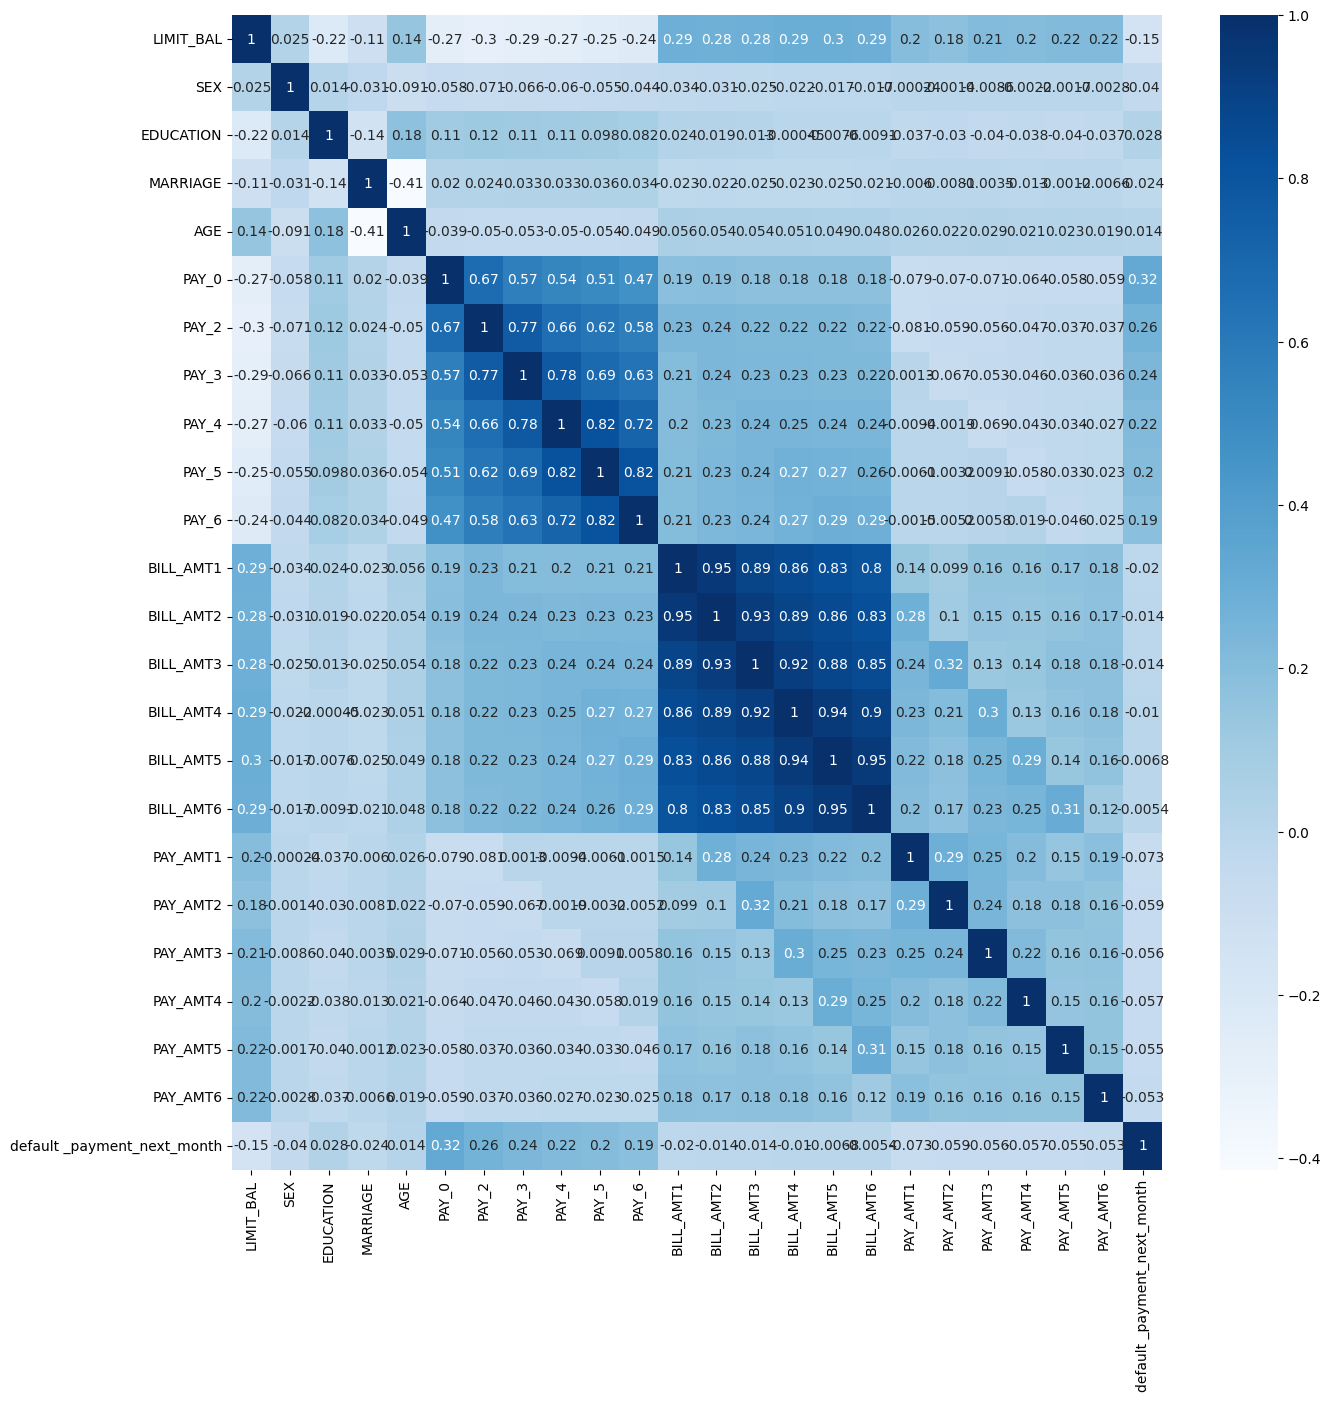

In [ ]:
# YOUR CODE HERE
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(), annot=True, cmap='Blues')

<Axes: >

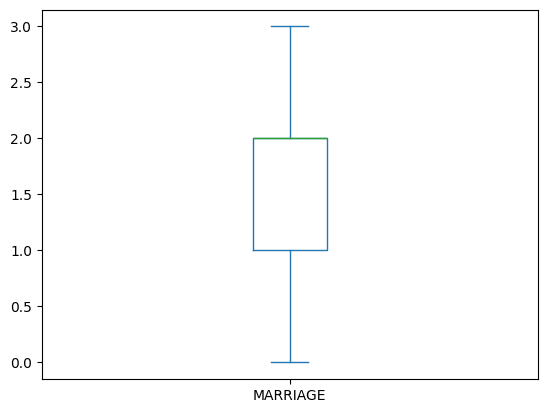

In [ ]:
# YOUR CODE HERE
# df["EDUCATION"].plot.box()
df["MARRIAGE"].plot.box()

## Preprocessing

In [ ]:
# YOUR CODE HERE
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default _payment_next_month'],
      dtype='object')

In [ ]:
x=df.drop("default _payment_next_month", axis=1)
y=df["default _payment_next_month"]
scaler=StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,1.451114,-1.057295,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,...,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130
29996,-0.134759,-1.234323,1.451114,0.858557,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,...,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382
29997,-1.059646,-1.234323,0.185828,0.858557,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,...,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001
29998,-0.674276,-1.234323,1.451114,-1.057295,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,...,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904


In [ ]:
# YOUR CODE HER
y

,default _payment_next_month
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


## Training of models

In [ ]:
from numpy.random.mtrand import logistic
# YOUR CODE HERE
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=45)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
model_logistic=LogisticRegression()
model_logistic.fit(x_train,y_train)
y_pred_log=model_logistic.predict(x_test)
print("Accuracy: ", accuracy_score(y_test,y_pred_log))

Accuracy:  0.8128888888888889


In [ ]:
# Support Vector Machine
model_svm= SVC()
model_svm.fit(x_train, y_train)
y_pred_svm = model_svm.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred_svm))



Accuracy:  0.8218888888888889


In [ ]:
# YOUR CODE HERE
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))

Accuracy:  0.82


## Evaluation of models

In [ ]:
# YOUR CODE HERE
def evaluation(y_test, y_pred, model_name):
    print(f'----{model_name}---')
    print("Accuracy",accuracy_score(y_test, y_pred))
    print("Confusion Matrix",confusion_matrix(y_test, y_pred))
    print("Precision",precision_score(y_test, y_pred))
    print("Recall",recall_score(y_test, y_pred))
    print("F1 Score",f1_score(y_test, y_pred))


In [ ]:
# YOUR CODE HERE
evaluation(y_test, y_pred_log, "Logistic Regression")
evaluation(y_test, y_pred_svm, "Support Vector Machine")
evaluation(y_test, y_pred_rf, "Random Forest")

----Logistic Regression---
Accuracy 0.8128888888888889
Confusion Matrix [[6846  201]
 [1483  470]]
Precision 0.7004470938897168
Recall 0.24065540194572452
F1 Score 0.35823170731707316
----Support Vector Machine---
Accuracy 0.8218888888888889
Confusion Matrix [[6726  321]
 [1282  671]]
Precision 0.6764112903225806
Recall 0.34357398873527906
F1 Score 0.45568760611205433
----Random Forest---
Accuracy 0.82
Confusion Matrix [[6651  396]
 [1224  729]]
Precision 0.648
Recall 0.37327188940092165
F1 Score 0.47368421052631576


In [ ]:
data={
    "model":["Logistic Regression", "Support Vector Machine", "Random Forest"],
    "accuracy":[accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_rf)],
}
result=pd.DataFrame(data)
result


,model,accuracy
0,Logistic Regression,0.812889
1,Support Vector Machine,0.821889
2,Random Forest,0.820000
